In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PLA = w1x1 + w2x2 + b

In [2]:
# Load data from local
data1 = np.loadtxt('Iris_training.txt', dtype=str)
data2 = np.loadtxt('Iris_test.txt', dtype=str)

train = []
test = []

for line in data1:
    split = line.split(',')
    train.append(( float(split[0]), float(split[1]), int(split[2]) ))

for line in data2:
    split = line.split(',')
    test.append(( float(split[0]), float(split[1]), int(split[2]) ))

In [3]:
# Weights and Bias
# Now time is 8:41, 10/10, and 3 hrs spent
w1 = 0.841
w2 = 0.1010
b = 0.0003

In [4]:
def sign(A):
    if A > 0:
        return 1
    elif A < 0:
        return -1
    else:
        return 0

In [5]:
epoch = 0
correct = 0
warning = 1000

cnt = 0
for i in train:
    cnt += 1

# Learning rate 0 < LA < 1
LA = 0.0015

# Check data good or bad, all good is done!
while correct != cnt and epoch != warning:
    correct = 0
    epoch += 1
    for i in train:
        # Learning rate biger or smaller by correct counts
        LA = LA + 1 / (correct + 0.99)
        if sign( w1 * i[0] + w2 * i[1] + b ) != i[2]:
            w1 = w1 + LA * i[2] * i[0]
            w2 = w2 + LA * i[2] * i[1]
            b = b + LA * i[2]
#             print(w1, w2, b)
        else:
            correct += 1
            
print("\n==== ==== ==== ====\n")
print("total epoch = {}".format(epoch))
print("weight-1 = {}".format(w1))
print("weight-2 = {}".format(w2))
print("bias = {}".format(b))
print("The line is {} * x1 + {} * x2 + {} = 0".format(w1, w2, b))

accuracy = correct / cnt

print("Training accuracy = {}%".format(accuracy*100))


==== ==== ==== ====

total epoch = 2
weight-1 = -22.551263965803116
weight-2 = 37.53621781885121
bias = 3.9603309115504444
The line is -22.551263965803116 * x1 + 37.53621781885121 * x2 + 3.9603309115504444 = 0
Training accuracy = 100.0%


In [6]:
cnt = 0
yes = 0

# Check test data
for i in test:
    cnt += 1
    val = sign( w1 * i[0] + w2 * i[1] + b )
    if i[2] == val:
        yes += 1
        print('test-{} correct'.format(cnt))
    else:
        print('test-{} incorrect, origin = {}'.format(cnt, i[2]))
        
accuracy = yes / cnt
print("Testing accuracy = {}%".format(accuracy*100))

test-1 correct
test-2 correct
test-3 correct
test-4 correct
test-5 correct
test-6 correct
test-7 correct
test-8 incorrect, origin = 1
test-9 correct
test-10 correct
Testing accuracy = 90.0%


In [7]:
def line(x):
    return ( w1 * x + b ) / (-w2)

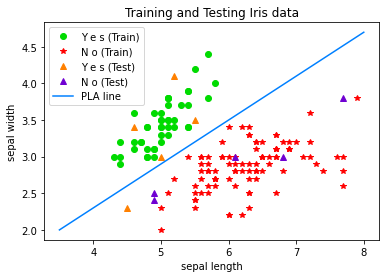

In [8]:
plt.title("Training and Testing Iris data")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

g1 = []
g2 = []
r1 = []
r2 = []
c1 = []
c2 = []
m1 = []
m2 = []

# Show the relation of data and line
# Grouping with class values
for i in train:
    if i[2] > 0:
        g1.append(i[0])
        g2.append(i[1])
    elif i[2] < 0:
        r1.append(i[0])
        r2.append(i[1])
    else:
        plt.plot(i[0], i[1], 'xk', label='ambiguity (Train)')

for i in test:
    if i[2] > 0:
        c1.append(i[0])
        c2.append(i[1])
    elif i[2] < 0:
        m1.append(i[0])
        m2.append(i[1])
    else:
        plt.plot(i[0], i[1], '^c', label='ambiguity (Test)')
        
        
plt.plot(g1, g2, 'o', color='#00DB00', label='Y e s (Train)')
plt.plot(r1, r2, '*', color='#FF0000', label='N o (Train)')

plt.plot(c1, c2, '^', color='#FF8000', label='Y e s (Test)')
plt.plot(m1, m2, '^', color='#6F00D2', label='N o (Test)')

space = np.linspace(3.5, 8, 50)
plt.plot(space, line(space), '-', color='#0080FF', label='PLA line')

plt.legend()

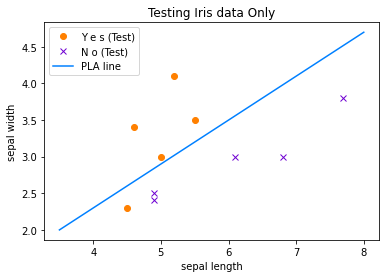

In [9]:
plt.title("Testing Iris data Only")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

plt.plot(c1, c2, 'o', color='#FF8000', label='Y e s (Test)')
plt.plot(m1, m2, 'x', color='#6F00D2', label='N o (Test)')

space = np.linspace(3.5, 8, 50)
plt.plot(space, line(space), '-', color='#0080FF', label='PLA line')

plt.legend()